In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv( "./data/titanic.csv" ) ## Give full path

In [3]:
#titanic_df = pd.read_csv( "C:\\dir1\\dir2\\data\\titanic.csv" ) ## Give full path

In [4]:
type( titanic_df )

pandas.core.frame.DataFrame

In [5]:
titanic_df.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [6]:
titanic_df.shape

(1313, 11)

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 112.9+ KB


### Indexing and Slicing

In [8]:
### First 3 records

titanic_df[0:3]

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male


In [9]:
### Last 3 records

titanic_df[-3:]

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male


In [12]:
## first 3 records and column called "name"

titanic_df[0:3]['name']

0           Allen, Miss Elisabeth Walton
1            Allison, Miss Helen Loraine
2    Allison, Mr Hudson Joshua Creighton
Name: name, dtype: object

In [14]:
### first 3 records and columns name and age

cols = ['name', 'age']
titanic_df[0:3][cols]

,name,age
0,"Allen, Miss Elisabeth Walton",29.0
1,"Allison, Miss Helen Loraine",2.0
2,"Allison, Mr Hudson Joshua Creighton",30.0


In [16]:
titanic_df[0:3][['name', 'age']] ## typically used

,name,age
0,"Allen, Miss Elisabeth Walton",29.0
1,"Allison, Miss Helen Loraine",2.0
2,"Allison, Mr Hudson Joshua Creighton",30.0


### Aggregations

### How may passengers survived?

In [17]:
## titanic_df['survived']
titanic_df.survived.value_counts()

0    864
1    449
Name: survived, dtype: int64

In [19]:
titanic_df.survived.value_counts( normalize = True ) * 100

0    65.803503
1    34.196497
Name: survived, dtype: float64

### Sex vs. Survival

In [22]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             margins = True )

survived,0,1,All
sex,,,
female,156,307,463
male,708,142,850
All,864,449,1313


In percentages:

1. Of all female how many survived or not survived? 
2. Of all those who survived, how many male and how many female?

In [23]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             normalize = "index" )

survived,0,1
sex,,
female,0.336933,0.663067
male,0.832941,0.167059


In [24]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             normalize = "columns" )

survived,0,1
sex,,
female,0.180556,0.683742
male,0.819444,0.316258


### Passenger of what age were mostly onboard the ship?

### Histogram

In [26]:
import matplotlib.pyplot as plt

(array([ 35.,  24., 107., 138., 105.,  79.,  66.,  40.,  25.,  14.]),
 array([ 0.1667 ,  7.25003, 14.33336, 21.41669, 28.50002, 35.58335,
        42.66668, 49.75001, 56.83334, 63.91667, 71.     ]),
 <a list of 10 Patch objects>)

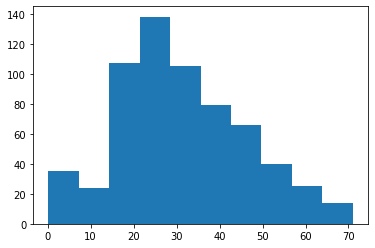

In [28]:
plt.hist( titanic_df.age.dropna() )

In [29]:
titanic_df.age.min()

0.1667

In [30]:
titanic_df.age.max()

71.0

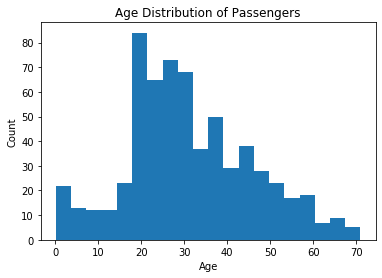

In [38]:
plt.hist( titanic_df.age.dropna(), bins = 20 );
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers");
plt.savefig("age.png")

In [39]:
import seaborn as sn

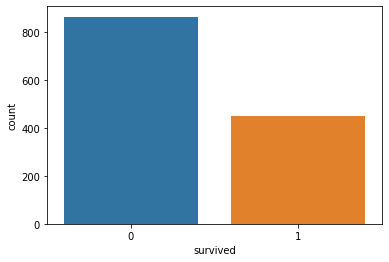

In [41]:
sn.countplot( data = titanic_df,
              x = 'survived' );

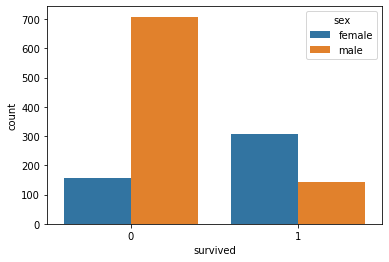

In [42]:
sn.countplot( data = titanic_df,
              x = 'survived',
              hue = 'sex' );

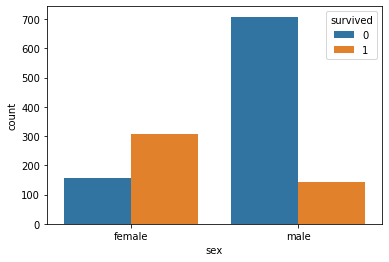

In [44]:
sn.countplot( data = titanic_df,
              hue = 'survived',
              x = 'sex' );
plt.savefig("survived.png")

### Filtering 

How many children were on board and how many survived?

In [45]:
children_df = titanic_df[titanic_df.age <= 5]

In [46]:
children_df.shape

(29, 11)

In [47]:
children_df.survived.value_counts()

1    24
0     5
Name: survived, dtype: int64

In [48]:
children_df = titanic_df[(titanic_df.age <= 5) & 
                         (titanic_df.sex == 'female')]

In [50]:
children_df.shape

(11, 11)

In [51]:
children_df.survived.value_counts()

1    9
0    2
Name: survived, dtype: int64

### Aggregations (GroupBy)

What is the average age of each passenger class?

In [52]:
age_df = titanic_df.groupby("pclass")['age'].mean()

In [53]:
age_df

pclass
1st    39.667773
2nd    28.300314
3rd    24.519658
Name: age, dtype: float64

In [54]:
type(age_df)

pandas.core.series.Series

In [55]:
age_df = age_df.reset_index()

In [60]:
type(age_df)

pandas.core.frame.DataFrame

In [56]:
age_df

,pclass,age
0,1st,39.667773
1,2nd,28.300314
2,3rd,24.519658


In [59]:
age_df.to_csv( "age.csv" )